
getting state GeoDataFrame
Sucessfully loaded state GeoDataFrame
getting state partition
generating map
Map with Polsby-Popper metric 0.21839108568131294 found: 
Population in each district:
District
0     742640
1     738685
2     738980
3     737135
4     735675
5     743980
6     741255
7     735030
8     743645
9     741305
10    735695
11    740674
12    733505
13    742605
14    743200
15    736390
16    739614
Name: C_TOT22, dtype: int32


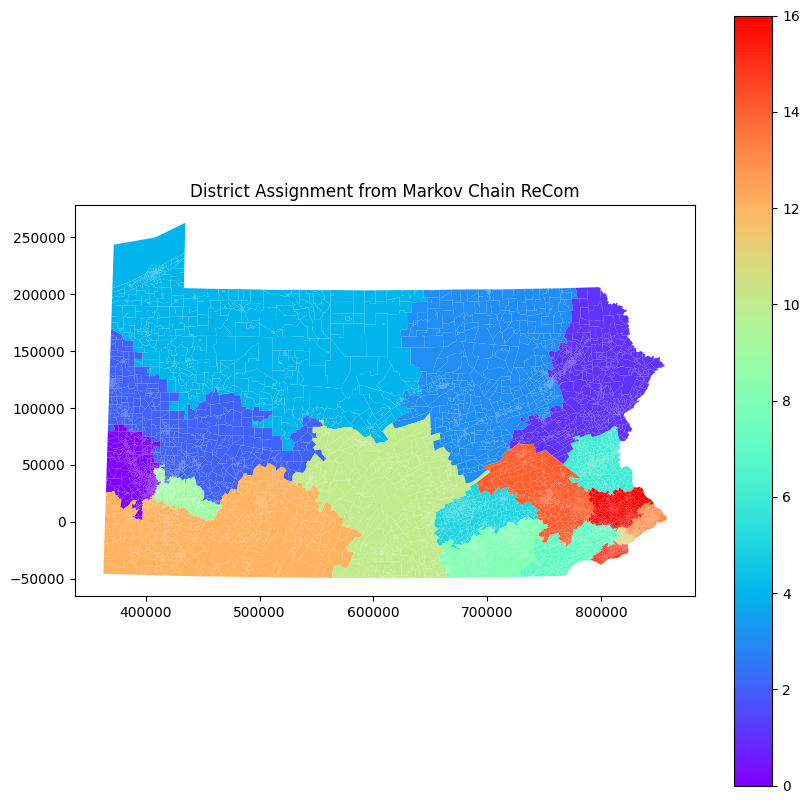

Map with Polsby-Popper metric 0.2183914528751515 found: 
Population in each district:
District
0     740835
1     738685
2     738980
3     737135
4     735675
5     743980
6     741255
7     735030
8     743645
9     743110
10    735695
11    740674
12    733505
13    742605
14    743200
15    736390
16    739614
Name: C_TOT22, dtype: int32


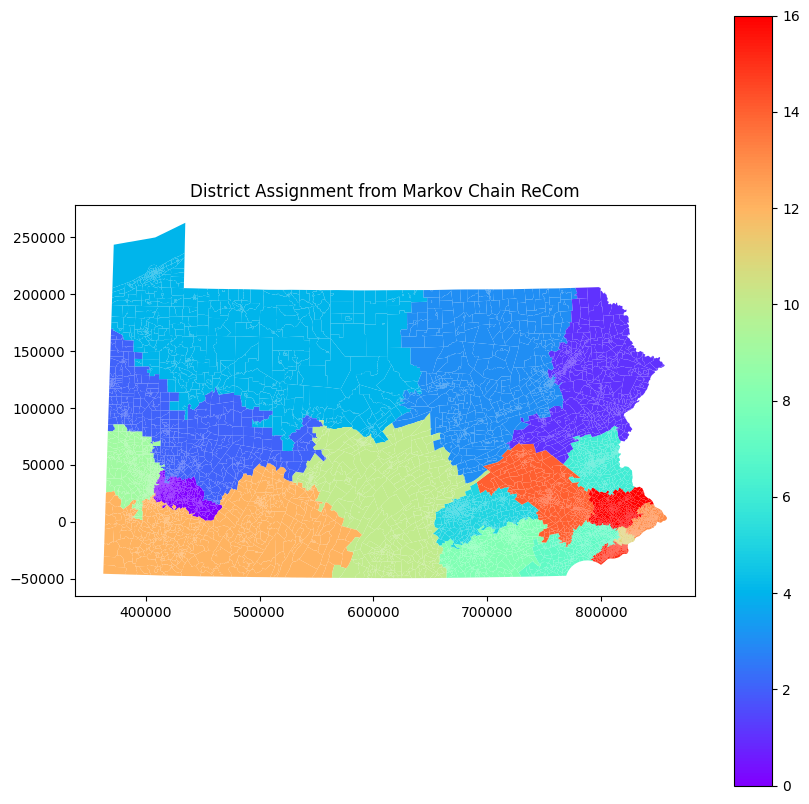

Map with Polsby-Popper metric 0.21934566712204387 found: 
Population in each district:
District
0     735840
1     740285
2     741940
3     733765
4     736970
5     736930
6     737380
7     739655
8     736390
9     745299
10    736765
11    735704
12    744480
13    740670
14    743255
15    740840
16    743845
Name: C_TOT22, dtype: int32


Dissolving maps...
Maps dissolved.
Saving maps to my_districts...
Maps saved.
getting state partition
generating map
Map with Polsby-Popper metric 0.21344589024568902 found: 
Population in each district:
District
0     743185
1     737615
2     734879
3     744824
4     734985
5     737845
6     739485
7     742240
8     742840
9     738540
10    734110
11    742595
12    740635
13    738955
14    744410
15    737850
16    735020
Name: C_TOT22, dtype: int32


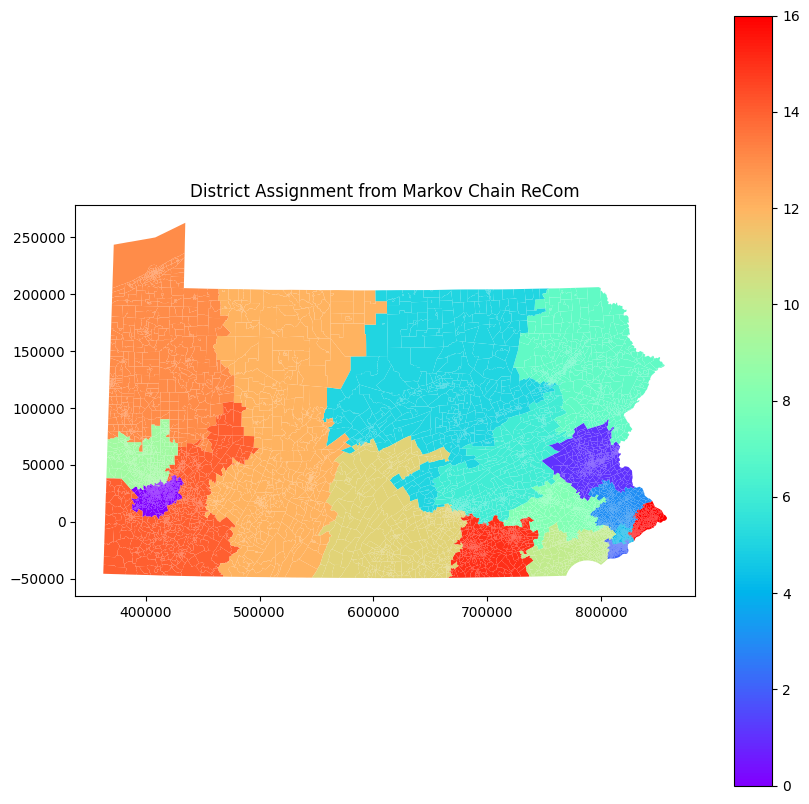

Map with Polsby-Popper metric 0.21533125128258826 found: 
Population in each district:
District
0     744849
1     745195
2     733775
3     733835
4     735635
5     740840
6     739160
7     737280
8     735250
9     742954
10    738345
11    734255
12    744120
13    738180
14    744695
15    738435
16    743210
Name: C_TOT22, dtype: int32


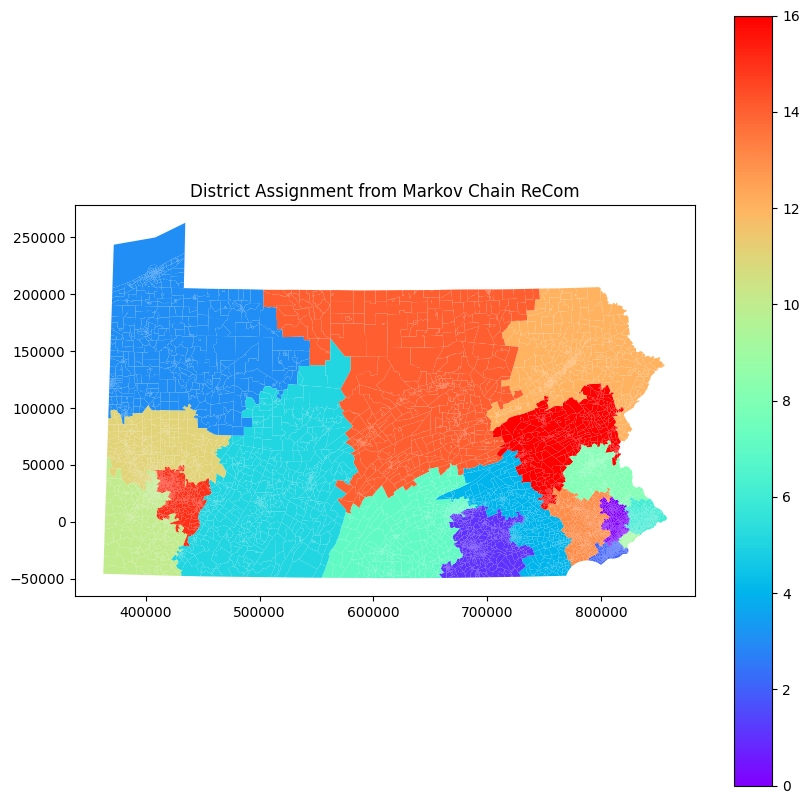

Map with Polsby-Popper metric 0.21516159608598207 found: 
Population in each district:
District
0     743185
1     737615
2     734879
3     744824
4     734985
5     737845
6     739485
7     742240
8     742840
9     738540
10    734110
11    736490
12    740635
13    738955
14    744410
15    743955
16    735020
Name: C_TOT22, dtype: int32


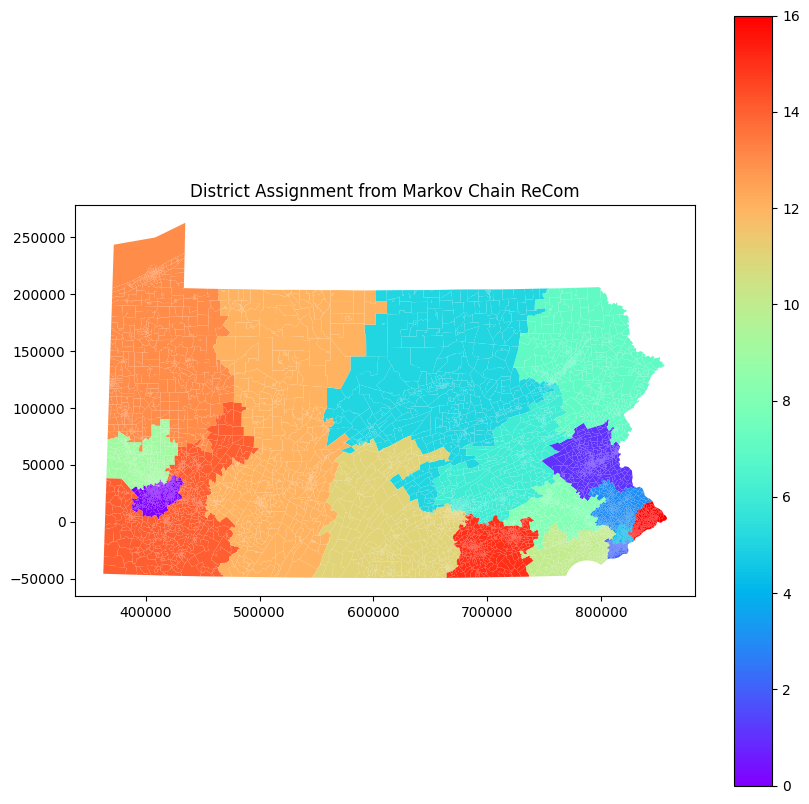

Dissolving maps...
Maps dissolved.


In [36]:
from fairymander.generator import DistrictGenerator

my_generator = DistrictGenerator("pa", 0.008, 7000, 3, "compact")

"""
Running this will save as the following file structure in the current directory, creating the directory if it doesnt exist:

my_districts
    |
    |-testing_ga
        |
        |-testing_ga-0
        |-testing_ga-1
        |-testing_ga-2

Where the final "prefix-index" folders will have all the .shp related files
"""
districts = my_generator.run_and_save(directory="my_districts", file_prefix="pa_pp")

districts = my_generator.run() # note, now returns the maps dissolved

In [44]:
from fairymander.data import get_curr_district_file
from fairymander.fairness import full_analysis, compare_maps
gdf = get_curr_district_file('pa')

compare_maps(districts[0], gdf)

Running Fairness Comparison Analysis
------------------------------------
Average Polsby-Popper Score for Map 1: 0.2134458902456893
Average Polsby-Popper Score for Map 2: 0.32140040968088557
Map Two has a better Polsby-Popper score

Average Reock Score for Map 1: 0.46997543797193586
Average Reock Score for Map 2: 0.4574047019400905
Map One has a better Reock score

Efficiency Gap for Map 1: 3.0282894347632743
Efficiency Gap for Map 2: -4.192647421974795
Map One has a better Efficiency Gap

Mean Median Difference, Map One: 2.6108935810297274
Mean Median Difference, Map Two: 0.9716164632503466
Map Two has a better Mean Median Difference

Lopsided Margin Score, Map One: 5.431352556981615
Lopsided Margin Score, Map Two: 0.34145453365105993
Map Two has a better Lopsided Margin Score

Dissimilarity index, Hispanic, for Map One: 0.34851583722567675
Dissimilarity index, African American, for Map One: 0.5596106037069077
Dissimilarity index, East and South Asian, for Map One: 0.3023552443463722


(['Reock',
  'Efficiency Gap',
  'Dissimilarity Index: Hispanic',
  'Dissimilarity Index: East and South Asian'],
 ['Polsby-Popper',
  'Mean Median Difference',
  'Lopsided Margin',
  'Dissimilarity Index: African American',
  'Dissimilarity Index: Native American',
  'Dissimilarity Index: Other'],
 [])

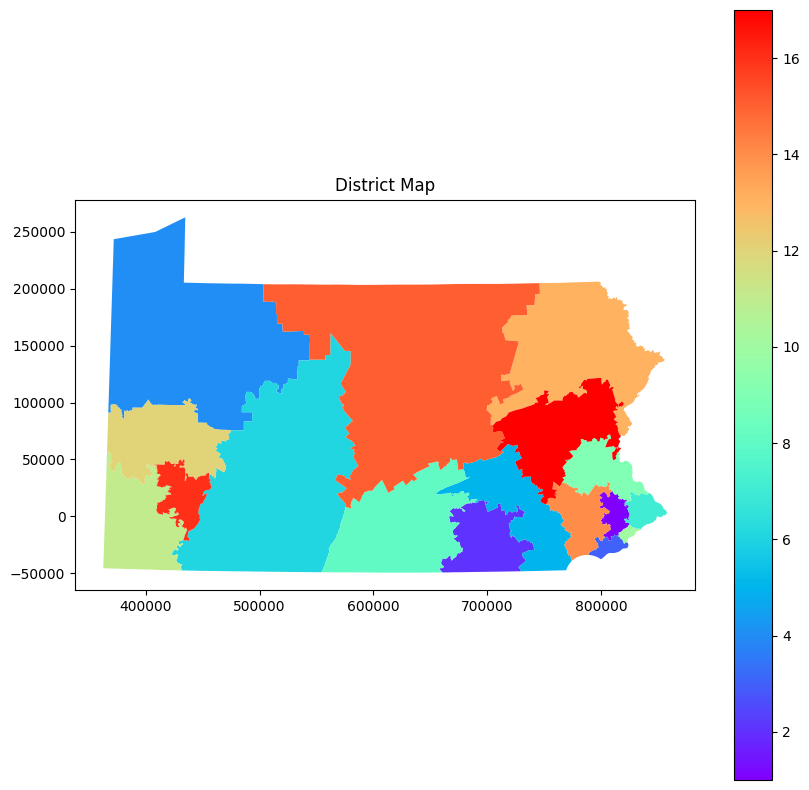

Running Fairness Analysis
-------------------------
Average Polsby-Popper Score: 0.21533125128258718

Average Reock Score: 0.46504841685007425

Efficiency Gap: 3.4872592669333673

Mean Median Difference: 3.2005712680646115

Lopsided Margin Score: 5.454574373226521

Dissimilarity index, Hispanic: 0.3502065916273197
Dissimilarity index, African American: 0.5924158162587152
Dissimilarity index, East and South Asian: 0.3089714136722526
Dissimilarity index, Native American: 0.13133271113300163
Dissimilarity index, Other: 0.1738329958671651



In [45]:
full_analysis(districts[1])

In [46]:
from fairymander.folium_converter import map_to_folium

res = map_to_folium('pa', districts[1])

res